In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv')
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


In [3]:
 df.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         26026
prob_cases         26098
new_case               0
pnew_case           3526
tot_death              0
conf_death         26787
prob_death         26787
new_death              0
pnew_death          3494
created_at             0
consent_cases      10015
consent_deaths      9009
dtype: int64

In [4]:
# df = df.dropna()
df.dropna(subset=['consent_cases', 'consent_deaths'], inplace=True)
df.fillna(method='bfill', inplace=True)

In [5]:
df.isnull().sum()

submission_date    0
state              0
tot_cases          0
conf_cases         0
prob_cases         0
new_case           0
pnew_case          0
tot_death          0
conf_death         0
prob_death         0
new_death          0
pnew_death         0
created_at         0
consent_cases      0
consent_deaths     0
dtype: int64

In [6]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,12727.0,3650.0,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,Agree,Agree
6,04/03/2020,ND,173,144788.0,29179.0,14,274.0,3,2482.0,429.0,0,3.0,04/03/2020 04:22:39 PM,Agree,Not agree
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,09/04/2021 12:00:00 AM,Agree,Agree


In [7]:
df.shape

(47047, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47047 entries, 1 to 60059
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  47047 non-null  object 
 1   state            47047 non-null  object 
 2   tot_cases        47047 non-null  int64  
 3   conf_cases       47047 non-null  float64
 4   prob_cases       47047 non-null  float64
 5   new_case         47047 non-null  int64  
 6   pnew_case        47047 non-null  float64
 7   tot_death        47047 non-null  int64  
 8   conf_death       47047 non-null  float64
 9   prob_death       47047 non-null  float64
 10  new_death        47047 non-null  int64  
 11  pnew_death       47047 non-null  float64
 12  created_at       47047 non-null  object 
 13  consent_cases    47047 non-null  object 
 14  consent_deaths   47047 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 5.7+ MB


In [9]:
df.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,4.704700e+04,4.704700e+04,47047.000000,47047.000000,47047.000000,47047.000000,47047.000000,47047.000000,47047.000000,47047.000000
mean,7.678524e+05,6.560142e+05,111338.980148,1869.697643,322.049695,11045.915765,9344.875316,1215.928284,20.434757,2.206857
std,1.288983e+06,1.058927e+06,161502.730398,5635.337022,1569.753785,15935.853920,10665.126943,1656.669021,48.173510,27.743607
min,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-171804.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,3.238500e+04,5.904800e+04,175.000000,20.000000,0.000000,566.000000,1230.000000,0.000000,0.000000,0.000000
50%,2.801820e+05,2.924160e+05,32731.000000,450.000000,19.000000,4525.000000,5412.000000,353.000000,4.000000,0.000000
75%,9.496810e+05,8.787170e+05,156314.500000,1742.500000,247.000000,15931.500000,14663.000000,1947.000000,20.000000,1.000000
max,1.130924e+07,1.045879e+07,850445.000000,319809.000000,171617.000000,95604.000000,71408.000000,7889.000000,1178.000000,2919.000000


In [10]:
df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,12727.0,3650.0,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,Agree,Agree
6,04/03/2020,ND,173,144788.0,29179.0,14,274.0,3,2482.0,429.0,0,3.0,04/03/2020 04:22:39 PM,Agree,Not agree
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,09/04/2021 12:00:00 AM,Agree,Agree


## Visualizations  

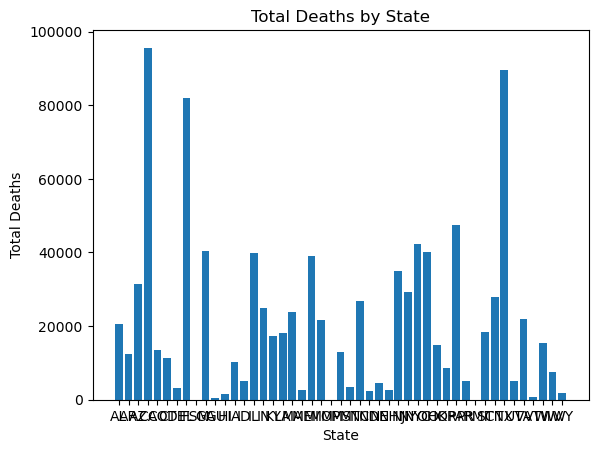

In [11]:
# Total Deaths by State
state_total_deaths = df.groupby('state')['tot_death'].max().reset_index()

# Create a bar chart
plt.bar(state_total_deaths['state'], state_total_deaths['tot_death'])
plt.title('Total Deaths by State')
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.show()

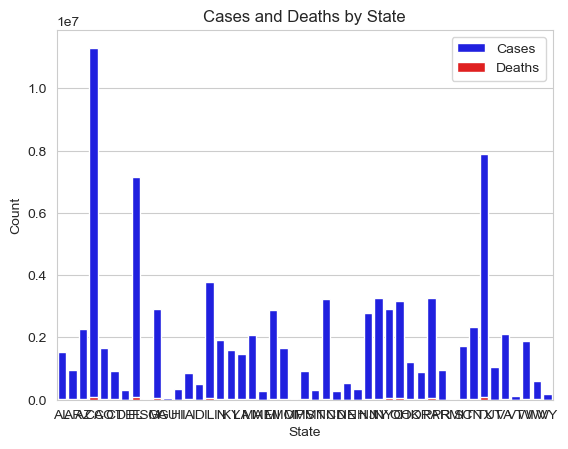

In [12]:
# Cases and Deaths by State
state_total_cases_deaths = df.groupby('state')[['tot_cases', 'tot_death']].max().reset_index()

# Create a stacked bar chart
sns.set_style("whitegrid")
sns.barplot(x="state", y="tot_cases", data=state_total_cases_deaths, color='b', label='Cases')
sns.barplot(x="state", y="tot_death", data=state_total_cases_deaths, color='r', label='Deaths')
plt.title('Cases and Deaths by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend()
plt.show()

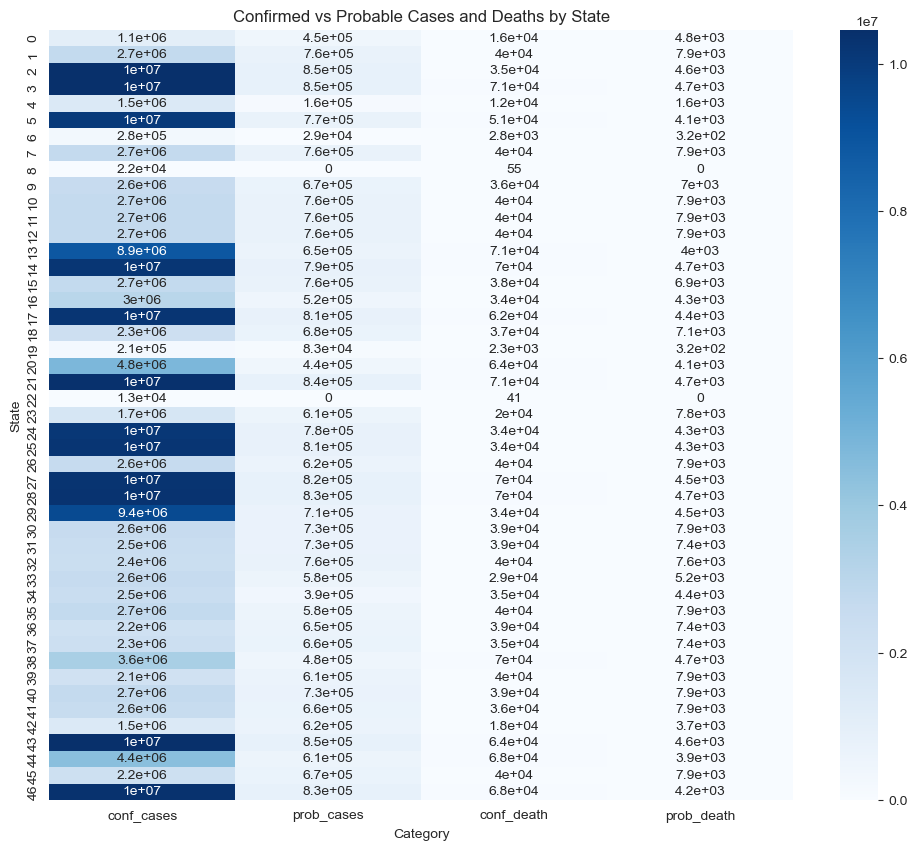

In [13]:
# Heatmap of Confirmed vs Probable Cases and Deaths by State
state_conf_prob_cases_deaths = df.groupby('state')[['conf_cases', 'prob_cases', 'conf_death', 'prob_death']].max().reset_index()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(state_conf_prob_cases_deaths[['conf_cases', 'prob_cases', 'conf_death', 'prob_death']], cmap='Blues', annot=True)
plt.title('Confirmed vs Probable Cases and Deaths by State')
plt.xlabel('Category')
plt.ylabel('State')
plt.show()

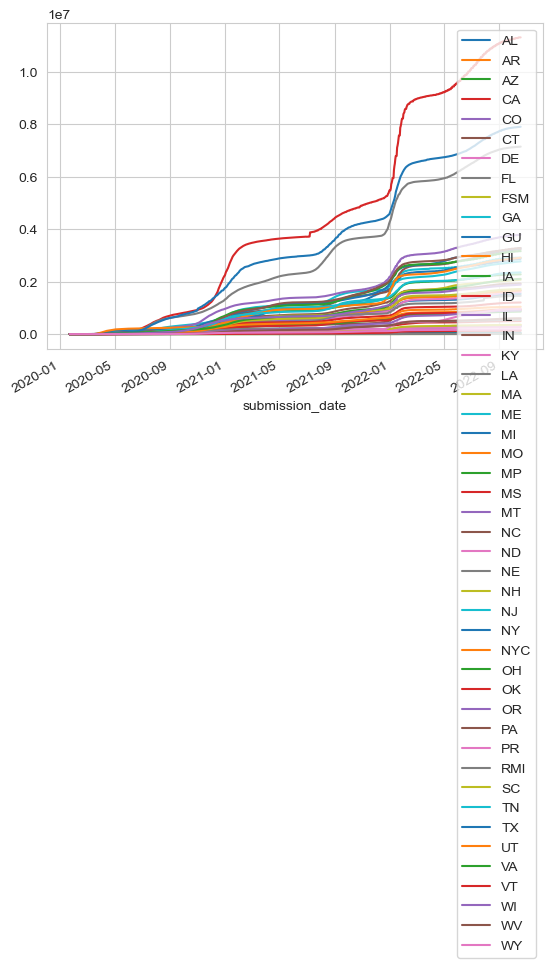

In [14]:
# Time series plot of total cases by state
df['submission_date'] = pd.to_datetime(df['submission_date'])
df = df.set_index('submission_date')

df.groupby('state')['tot_cases'].plot()
plt.legend()
plt.show()

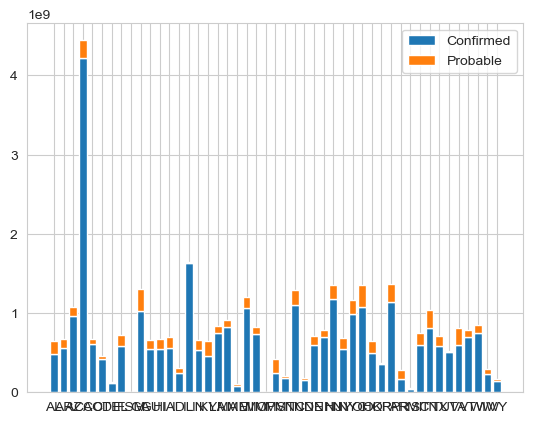

In [15]:
# confirmed cases vs. probable cases by state:
confirmed = df.groupby('state')['conf_cases'].sum()
probable = df.groupby('state')['prob_cases'].sum()

plt.bar(confirmed.index, confirmed, label='Confirmed')
plt.bar(probable.index, probable, bottom=confirmed, label='Probable')
plt.legend()
plt.show()

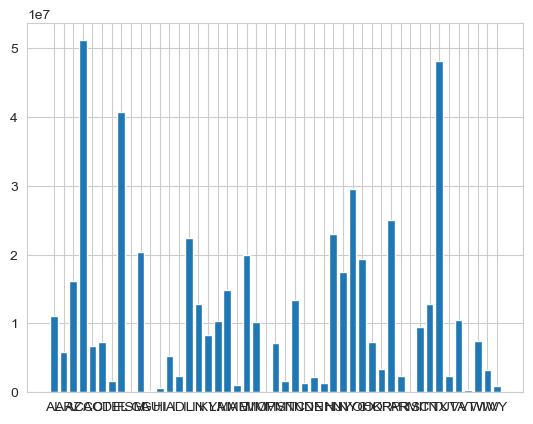

In [16]:
# total deaths by state
deaths = df.groupby('state')['tot_death'].sum()

plt.bar(deaths.index, deaths)
plt.show()

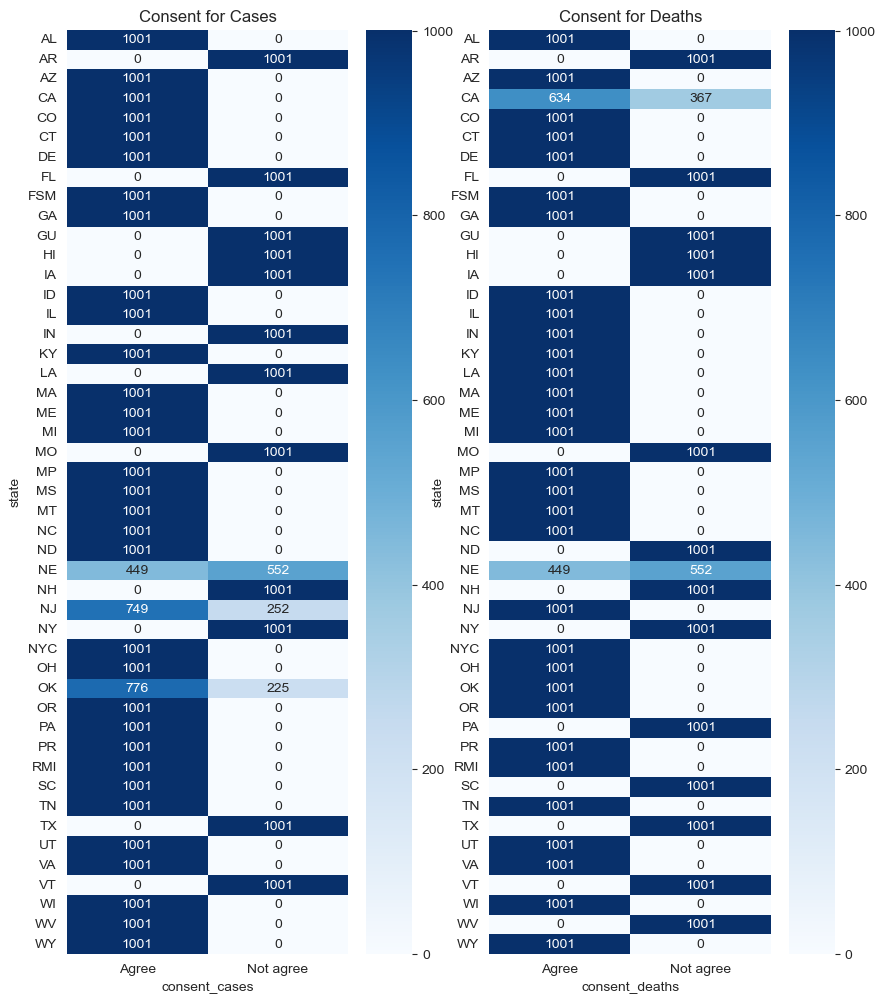

In [17]:
# Heatmap of consent for cases and deaths by state
consent_cases = pd.crosstab(df['state'], df['consent_cases'])
consent_deaths = pd.crosstab(df['state'], df['consent_deaths'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 12))
sns.heatmap(consent_cases, cmap='Blues', annot=True, fmt='d', ax=ax1)
sns.heatmap(consent_deaths, cmap='Blues', annot=True, fmt='d', ax=ax2)
ax1.set_title('Consent for Cases')
ax2.set_title('Consent for Deaths')
plt.show()

### Label endoder 

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['consent_cases']=encoder.fit_transform(df['consent_cases'])

df.head()

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,,
2021-12-01,ND,163565,135705.0,27860.0,589,220.0,1907,12727.0,3650.0,9,0.0,12/02/2021 02:35:20 PM,0,Not agree
2021-11-22,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,0,Agree
2020-05-17,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,0,Agree
2020-04-03,ND,173,144788.0,29179.0,14,274.0,3,2482.0,429.0,0,3.0,04/03/2020 04:22:39 PM,0,Not agree
2021-09-04,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,09/04/2021 12:00:00 AM,0,Agree


In [19]:
df['consent_deaths']=encoder.fit_transform(df['consent_deaths'])
df.head()

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,,
2021-12-01,ND,163565,135705.0,27860.0,589,220.0,1907,12727.0,3650.0,9,0.0,12/02/2021 02:35:20 PM,0,1
2021-11-22,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,0,0
2020-05-17,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,0,0
2020-04-03,ND,173,144788.0,29179.0,14,274.0,3,2482.0,429.0,0,3.0,04/03/2020 04:22:39 PM,0,1
2021-09-04,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,09/04/2021 12:00:00 AM,0,0


## Modeling the dataset

In [20]:
df = df.reset_index(drop=True)
df.head()

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,ND,163565,135705.0,27860.0,589,220.0,1907,12727.0,3650.0,9,0.0,12/02/2021 02:35:20 PM,0,1
1,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,0,0
2,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,05/18/2020 04:01:54 PM,0,0
3,ND,173,144788.0,29179.0,14,274.0,3,2482.0,429.0,0,3.0,04/03/2020 04:22:39 PM,0,1
4,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,09/04/2021 12:00:00 AM,0,0


In [21]:
df.drop(['state', 'created_at'], axis = 1, inplace=True)
df.head()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
0,163565,135705.0,27860.0,589,220.0,1907,12727.0,3650.0,9,0.0,0,1
1,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,0,0
2,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0
3,173,144788.0,29179.0,14,274.0,3,2482.0,429.0,0,3.0,0,1
4,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,0,0


## Data spliting 

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns= 'consent_deaths', axis = 1)
y = df['consent_deaths']
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


print("Shapes of X_train and X_test: ",X_train.shape, X_test.shape)
print("Shape of y_train and y_test: ",y_train.shape, y_test.shape)

Shape of X:  (47047, 11)
Shape of y:  (47047,)
Shapes of X_train and X_test:  (37637, 11) (9410, 11)
Shape of y_train and y_test:  (37637,) (9410,)


## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

X_train_predict = lr.predict(X_train)
y_pred = lr.predict(X_test)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy is : ", training_data_accuracy)

Train accuracy is :  0.6765417009857321


##### 

In [24]:
y_pred = lr.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.6726886291179596



 Classification report

              precision    recall  f1-score   support

           0       0.70      0.92      0.79      6431
           1       0.44      0.13      0.20      2979

    accuracy                           0.67      9410
   macro avg       0.57      0.53      0.50      9410
weighted avg       0.62      0.67      0.61      9410



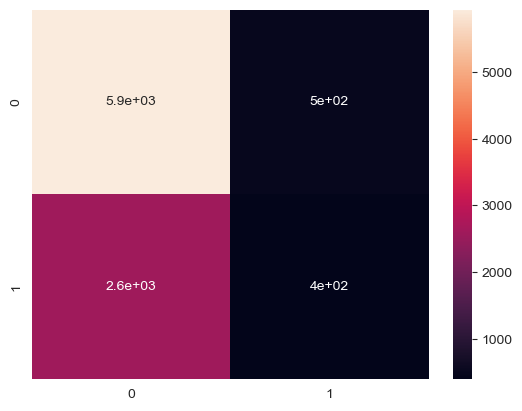

In [25]:
cm = confusion_matrix(y,y_pred)
sns.heatmap(cm, annot=True)
print("\n Classification report\n")
print(classification_report(y,y_pred))

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [27]:
dt_clf = dtc.fit(X_train,y_train)
X_train_predict = dtc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy is : ", training_data_accuracy)

Train accuracy is :  0.999468608018705


In [28]:
y_pred = dtc.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.9722635494155154



 Classification report

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6431
           1       0.96      0.96      0.96      2979

    accuracy                           0.97      9410
   macro avg       0.97      0.97      0.97      9410
weighted avg       0.97      0.97      0.97      9410



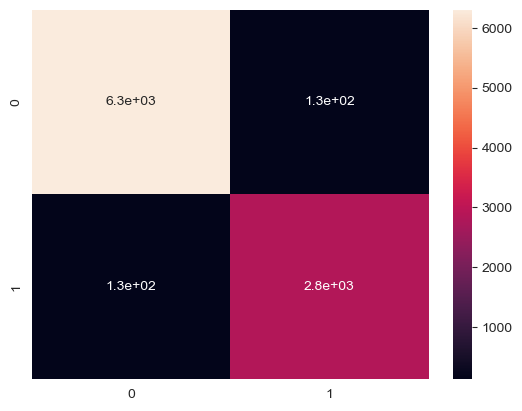

In [29]:
cm1 = confusion_matrix(y,y_pred)
sns.heatmap(cm1, annot=True)
print("\n Classification report\n")
print(classification_report(y,y_pred))

## KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=4,algorithm='ball_tree')

In [31]:
kn_clf = kn.fit(X_train,y_train)
X_train_predict = kn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy is : ", training_data_accuracy)

Train accuracy is :  0.9298562584690597


In [32]:
y_pred = kn.predict(X_test)
y=y_test
test_data_accuracy = accuracy_score(y,y_pred)
print("Test accuracy is : ", test_data_accuracy)

Test accuracy is :  0.8866099893730074



 Classification report

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6431
           1       0.86      0.76      0.81      2979

    accuracy                           0.89      9410
   macro avg       0.88      0.85      0.86      9410
weighted avg       0.89      0.89      0.88      9410



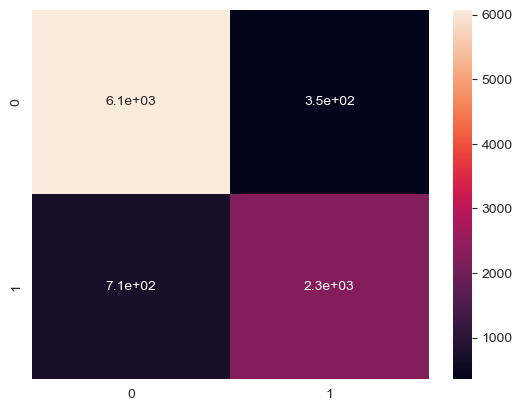

In [33]:
cm2 = confusion_matrix(y,y_pred)
sns.heatmap(cm2, annot=True)
print("\n Classification report\n")
print(classification_report(y,y_pred))

## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [35]:
rf_clf = rfc.fit(X_train,y_train)
rf_clf
y_pred = rf_clf.predict(X_test)

In [36]:
X_train_predict = rfc.predict(X_train)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
training_data_accuracy = accuracy_score(X_train_predict, y_train)
print("Train accuracy: ", training_data_accuracy)

Train accuracy:  0.999468608018705


In [37]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9812964930924548


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6431
           1       0.98      0.96      0.97      2979

    accuracy                           0.98      9410
   macro avg       0.98      0.98      0.98      9410
weighted avg       0.98      0.98      0.98      9410



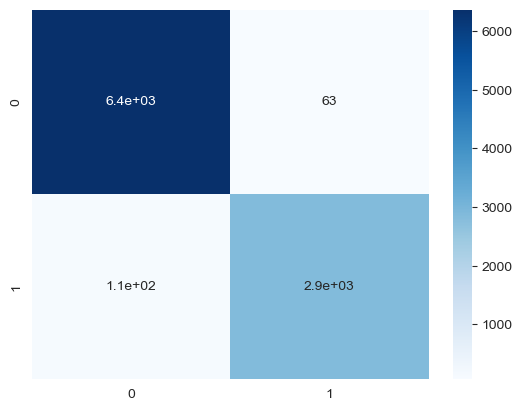

In [38]:
print(classification_report(y_test, y_pred))
cm3 = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm3, annot=True, cmap='Blues')

In [39]:
!pip install psycopg2

In [40]:
import psycopg2
con =  psycopg2.connect(host='localhost',
                          user= 'postgres',
                          password= '12345',
                          database= 'postgres')

In [41]:
df

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
0,163565,135705.0,27860.0,589,220.0,1907,12727.0,3650.0,9,0.0,0,1
1,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,0,0
2,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0
3,173,144788.0,29179.0,14,274.0,3,2482.0,429.0,0,3.0,0,1
4,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47042,752108,24038.0,185.0,282,0.0,13806,13383.0,423.0,5,0.0,1,0
47043,2504556,24038.0,185.0,13329,2676.0,43306,1172.0,19.0,207,0.0,1,1
47044,913561,24038.0,185.0,8217,1677.0,19014,1172.0,19.0,79,5.0,1,1
47045,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0,0,0


In [42]:
cur = con.cursor()
cur.execute("CREATE TABLE IF NOT EXISTS COVID_data (tot_cases INTEGER, conf_cases REAL, prob_cases REAL, new_case INTEGER, pnew_case REAL, tot_death INTEGER, conf_death REAL, prob_death REAL, new_death INTEGER, pnew_death REAL, consent_cases INTEGER, consent_deaths INTEGER)")
con.commit()


In [45]:
for index, row in df.iterrows():
    cur.execute("INSERT INTO COVID_data (tot_cases, conf_cases, prob_cases, new_case, pnew_case, tot_death, conf_death, prob_death, new_death, pnew_death, consent_cases, consent_deaths) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
                (row['tot_cases'], row['conf_cases'], row['prob_cases'], row['new_case'], row['pnew_case'], row['tot_death'], row['conf_death'], row['prob_death'], row['new_death'], row['pnew_death'], row['consent_cases'], row['consent_deaths']))

# Commit the changes to the database and close the connection
con.commit()
cur.close()
con.close()



